In [2]:
# === Import Libraries ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
)

In [3]:
# === Load Dataset ===
cust_churn_df = pd.read_csv("Churn_Modelling.csv")

In [4]:
# === Drop Unnecessary Columns ===
cust_churn_df = cust_churn_df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [5]:
# Encoding categorical variables
le = LabelEncoder()
cust_churn_df['Gender'] = LabelEncoder().fit_transform(cust_churn_df['Gender'])

In [6]:
#Encoding the Geographical feature through the One hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_geography = encoder.fit_transform(cust_churn_df[['Geography']])

In [7]:
# Convert encoded features into DataFrame
encoded_df = pd.DataFrame(encoded_geography, columns=encoder.get_feature_names_out(['Geography']))

In [8]:
# Merge with the original DataFrame (excluding original categorical column)
cust_churn_df_encoded = pd.concat([cust_churn_df.drop('Geography', axis=1), encoded_df], axis=1)
print("\nAfter One-Hot Encoding:")
print(cust_churn_df_encoded)


After One-Hot Encoding:
      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  Esti

In [9]:
X = cust_churn_df_encoded.drop('Exited', axis=1)
y = cust_churn_df_encoded['Exited']
print(cust_churn_df_encoded)

      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geog

In [10]:
#Normalizing the Dataset
scaler = MinMaxScaler()

In [11]:
X[['CreditScore','Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(X[['CreditScore','Age', 'Balance', 'EstimatedSalary']])

In [12]:
#Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# === Random Forest Model ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

In [16]:
print("🎯 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# Test Kappa score
from sklearn.metrics import cohen_kappa_score
kappa_score = cohen_kappa_score(y_test, rf_pred)
print(f"Test Kappa score: {kappa_score:.4f}")

🎯 Random Forest Results
Accuracy: 0.866
Confusion Matrix:
 [[1548   59]
 [ 209  184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Test Kappa score: 0.5042


In [18]:
# === XGBoost Model ===
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:31:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
print("\n🚀 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

# Test Kappa score
from sklearn.metrics import cohen_kappa_score
kappa_score = cohen_kappa_score(y_test, rf_pred)
print(f"Test Kappa score: {kappa_score:.4f}")



🚀 XGBoost Results
Accuracy: 0.8695
Confusion Matrix:
 [[1543   64]
 [ 197  196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Test Kappa score: 0.5042


/tmp/ipython-input-2862193368.py:8: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


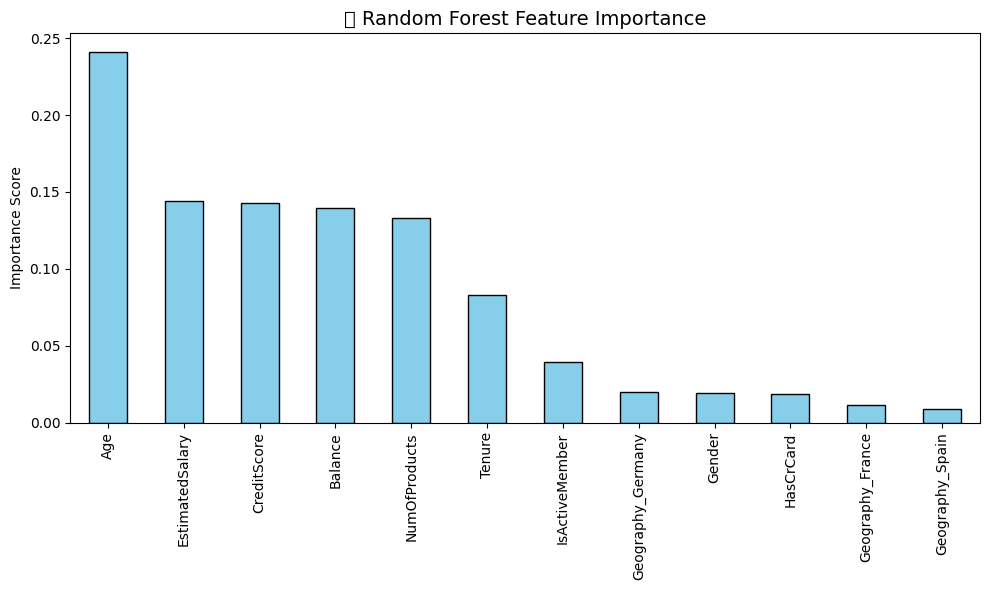

In [20]:
# === Feature Importance - Random Forest ===
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
rf_importances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("🌲 Random Forest Feature Importance", fontsize=14)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

/tmp/ipython-input-4095204019.py:8: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


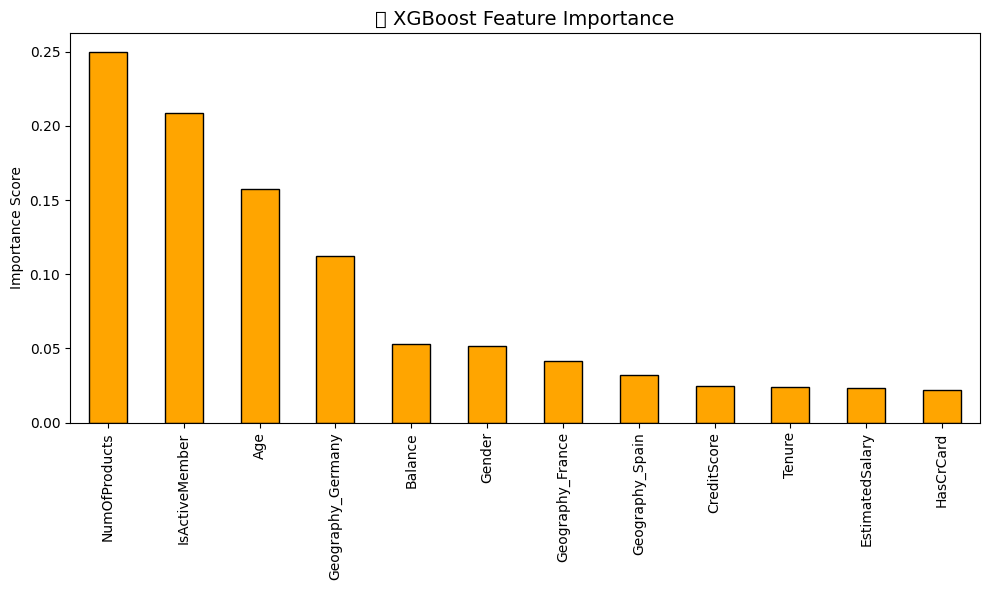

In [21]:
# === Feature Importance - XGBoost ===
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
xgb_importances.plot(kind='bar', color='orange', edgecolor='black')
plt.title("🔥 XGBoost Feature Importance", fontsize=14)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [23]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_prob = gb_model.predict_proba(X_test)[:, 1]

print("\n🌿 Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))

# Test Kappa score
from sklearn.metrics import cohen_kappa_score
kappa_score = cohen_kappa_score(y_test, rf_pred)
print(f"Test Kappa score: {kappa_score:.4f}")


🌿 Gradient Boosting Results
Accuracy: 0.864
Confusion Matrix:
 [[1542   65]
 [ 207  186]]
Test Kappa score: 0.5042


/tmp/ipython-input-2404710301.py:7: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


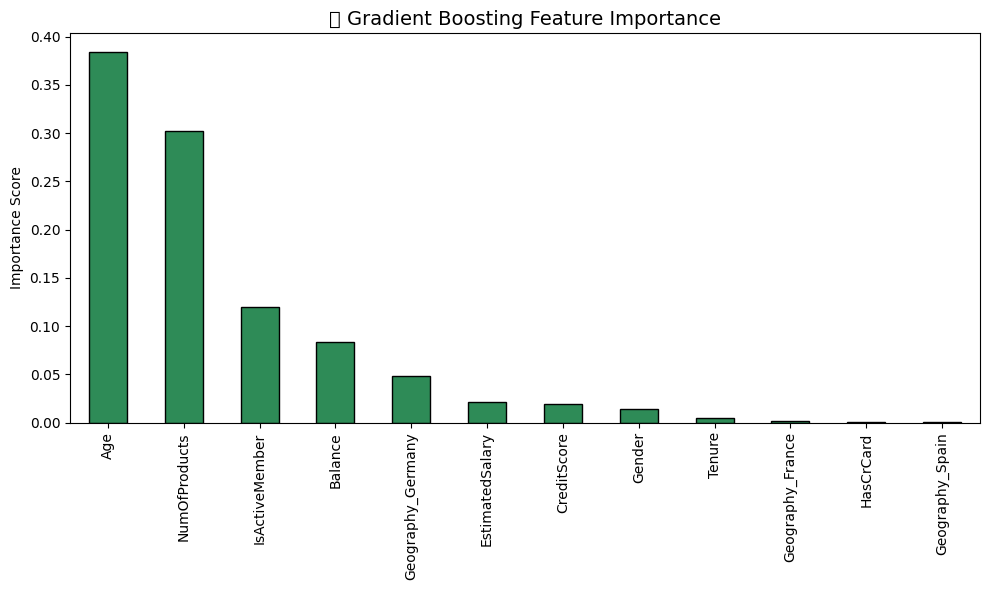

In [24]:
# === Feature Importance - Gradient Boosting ===
gb_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
gb_importances.plot(kind='bar', color='seagreen', edgecolor='black')
plt.title("🌿 Gradient Boosting Feature Importance", fontsize=14)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [25]:
# ============================================================
# 📊 MODEL PERFORMANCE SUMMARY
# ============================================================
print("\n📊 Summary of Model Accuracies:")
print(f"Random Forest Accuracy:  {accuracy_score(y_test, rf_pred):.4f}")
print(f"XGBoost Accuracy:        {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.4f}")


📊 Summary of Model Accuracies:
Random Forest Accuracy:  0.8660
XGBoost Accuracy:        0.8695
Gradient Boosting Accuracy: 0.8640


In [27]:
# ============================================================
# ⚖️ LOGISTIC REGRESSION (LINEAR MODEL)
# ============================================================
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_prob = lr_model.predict_proba(X_test)[:, 1]

print("⚖️ Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))
# Test Kappa score
from sklearn.metrics import cohen_kappa_score
kappa_score = cohen_kappa_score(y_test, rf_pred)
print(f"Test Kappa score: {kappa_score:.4f}")

⚖️ Logistic Regression Results
Accuracy: 0.8115
Confusion Matrix:
 [[1548   59]
 [ 318   75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.19      0.28       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Test Kappa score: 0.5042


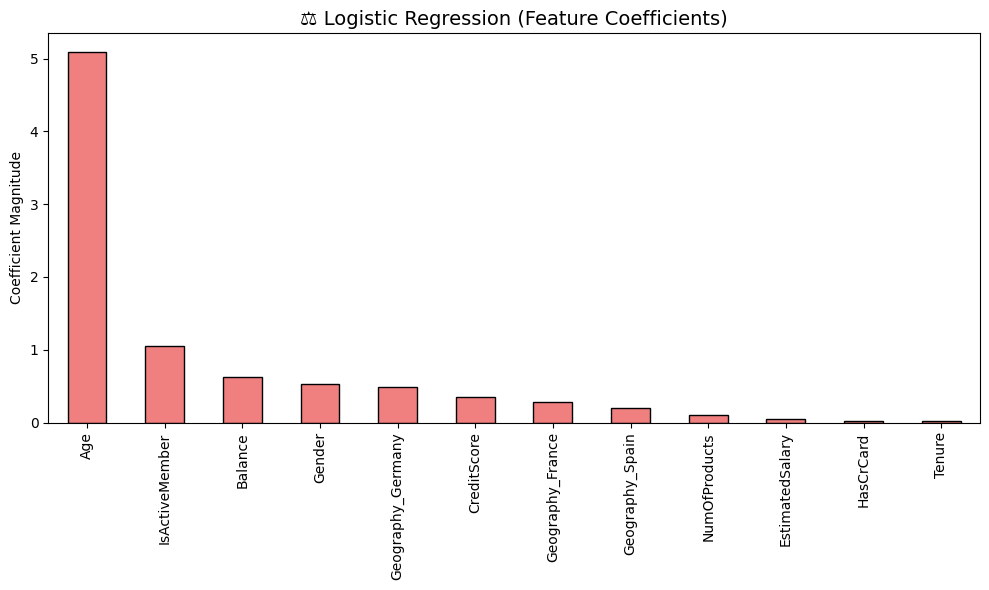

In [28]:
# === Coefficients (Feature Importance) ===
lr_importances = pd.Series(abs(lr_model.coef_[0]), index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
lr_importances.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("⚖️ Logistic Regression (Feature Coefficients)", fontsize=14)
plt.ylabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# 📊 MODEL PERFORMANCE SUMMARY
# ============================================================
print("\n📊 Summary of Model Accuracies:")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Random Forest Accuracy:       {accuracy_score(y_test, rf_pred):.4f}")
print(f"Gradient Boosting Accuracy:   {accuracy_score(y_test, gb_pred):.4f}")
print(f"XGBoost Accuracy:             {accuracy_score(y_test, xgb_pred):.4f}")


📊 Summary of Model Accuracies:
Logistic Regression Accuracy: 0.8115
Random Forest Accuracy:       0.8660
Gradient Boosting Accuracy:   0.8640
XGBoost Accuracy:             0.8695


/tmp/ipython-input-3483978593.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


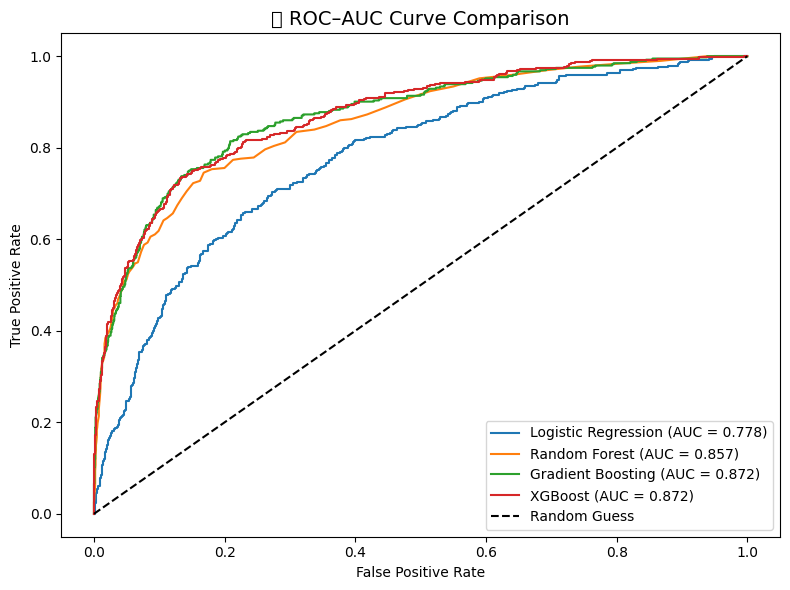

In [ ]:
# ============================================================
# 📈 ROC–AUC CURVE COMPARISON
# ============================================================
models = {
    "Logistic Regression": (y_test, lr_prob),
    "Random Forest": (y_test, rf_prob),
    "Gradient Boosting": (y_test, gb_prob),
    "XGBoost": (y_test, xgb_prob),
}

plt.figure(figsize=(8,6))
for name, (y_true, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("📈 ROC–AUC Curve Comparison", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()
